# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os 

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy 

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 581


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jetpur
Processing Record 2 of Set 1 | touros
Processing Record 3 of Set 1 | colares
Processing Record 4 of Set 1 | chonchi
Processing Record 5 of Set 1 | olonkinbyen
Processing Record 6 of Set 1 | ust'-ordynskiy
Processing Record 7 of Set 1 | papatowai
Processing Record 8 of Set 1 | yeppoon
Processing Record 9 of Set 1 | bilibino
Processing Record 10 of Set 1 | stanley
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | bethel
Processing Record 14 of Set 1 | east london
Processing Record 15 of Set 1 | bengkulu
Processing Record 16 of Set 1 | waitangi
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | grytviken
Processing Record 19 of Set 1 | adamstown
Processing Record 20 of Set 1 | mil'kovo
Processing Record 21 of Set 1 | rumphi
Processing Record 22 of Set 1 | edinburgh of the seven seas
Processing Record 23 of 

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# city_data_df.info()
# Show Record Count
city_data_df.count()

City          556
Lat           556
Lng           556
Max Temp      556
Humidity      556
Cloudiness    556
Wind Speed    556
Country       556
Date          556
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,jetpur,21.7333,70.6167,79.72,83,98,11.01,IN,1722996809
1,touros,-5.1989,-35.4608,74.46,84,1,12.91,BR,1722996810
2,colares,38.7992,-9.4469,70.79,83,30,17.90,PT,1722996811
3,chonchi,-42.6128,-73.8092,38.12,96,10,1.61,CL,1722996812
4,olonkinbyen,70.9221,-8.7187,42.03,100,100,13.62,SJ,1722996813


In [20]:

# Save the file in the output_data directory
# Export the City_Data into a csv
os.makedirs("output_data", exist_ok=True)

city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")



In [21]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,jetpur,21.7333,70.6167,79.72,83,98,11.01,IN,1722996809
1,touros,-5.1989,-35.4608,74.46,84,1,12.91,BR,1722996810
2,colares,38.7992,-9.4469,70.79,83,30,17.90,PT,1722996811
3,chonchi,-42.6128,-73.8092,38.12,96,10,1.61,CL,1722996812
4,olonkinbyen,70.9221,-8.7187,42.03,100,100,13.62,SJ,1722996813


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

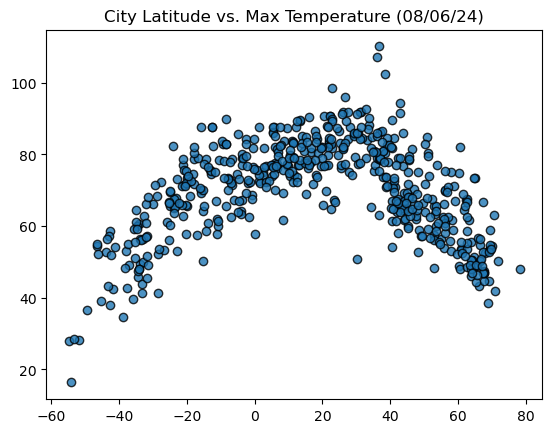

In [22]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

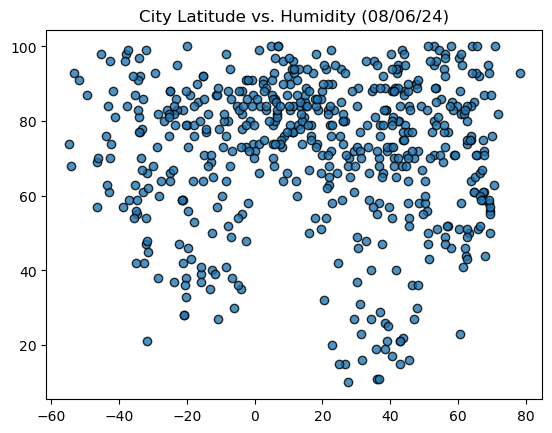

In [23]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

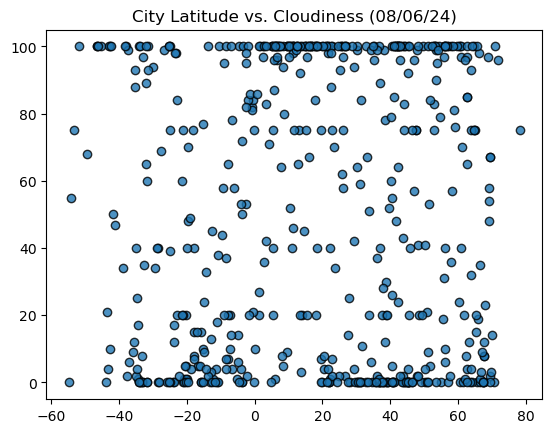

In [24]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

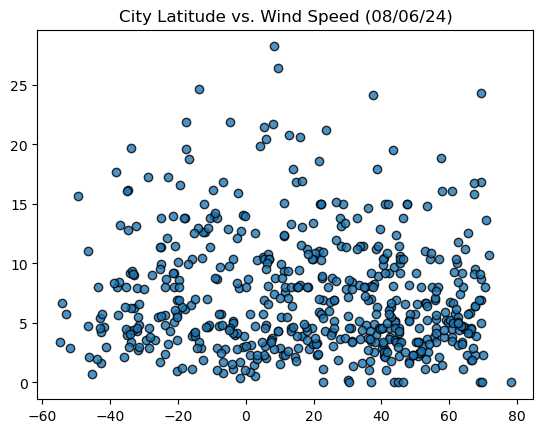

In [25]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [26]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Run regression on hemisphere weather data
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    plt.show()

In [27]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,jetpur,21.7333,70.6167,79.72,83,98,11.01,IN,1722996809
2,colares,38.7992,-9.4469,70.79,83,30,17.90,PT,1722996811
4,olonkinbyen,70.9221,-8.7187,42.03,100,100,13.62,SJ,1722996813
5,ust'-ordynskiy,52.8050,104.7508,65.73,71,83,6.71,RU,1722996814
8,bilibino,68.0546,166.4372,52.54,44,23,3.94,RU,1722996818


In [28]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,touros,-5.1989,-35.4608,74.46,84,1,12.91,BR,1722996810
3,chonchi,-42.6128,-73.8092,38.12,96,10,1.61,CL,1722996812
6,papatowai,-46.5619,169.4708,54.41,57,100,4.76,NZ,1722996815
7,yeppoon,-23.1333,150.7333,67.78,86,98,12.15,AU,1722996816
11,puerto ayora,-0.7393,-90.3518,68.56,91,82,3.00,EC,1722996821


###  Temperature vs. Latitude Linear Regression Plot

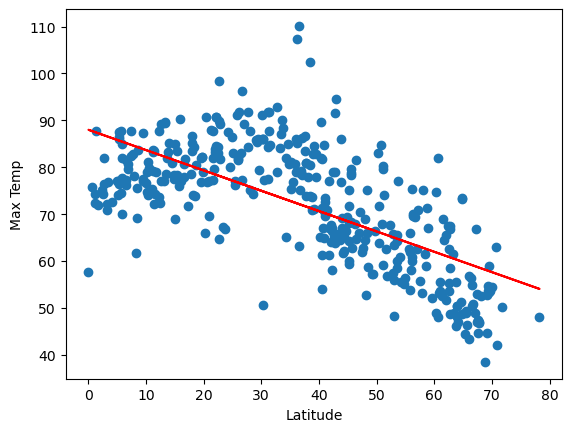

The r-squared is: 0.4533594351827133


In [61]:

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
r_squared = r_value**2
plot_linear_regression(x_values, y_values, 'Max Temp', (6, 30),)
print(f"The r-squared is: {r_squared}")


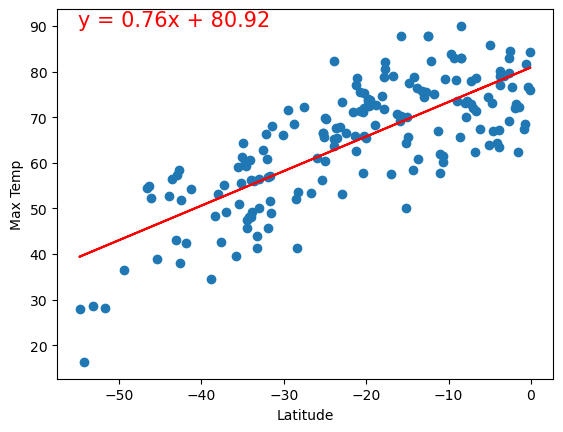

The r-squared is: 0.4533594351827133


In [62]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(-55,90))
r_squared = r_value**2
print(f"The r-squared is: {r_squared}")


**Discussion about the linear relationship:**
Northern Hemisphere:
Variables: Latitude (x) vs. Max Temperature (y)
Slope: The slope of the regression line is negative, indicating that as latitude increases , the maximum temperature decreases. This is consistent with the general understanding that higher latitudes receive less solar energy, leading to lower temperatures.
R² Value: The R² value quantifies the proportion of the variance in the maximum temperature that can be explained by latitude. A higher R² value indicates a stronger linear relationship. In this case, the R² value suggests a moderate to strong linear relationship, meaning that latitude is a significant predictor of maximum temperature in the Northern Hemisphere.
Temperature Gradient: The negative slope confirms the expected temperature gradient, with temperatures decreasing as one moves from the equator to higher latitudes.
Strength of Relationship: The R² value indicates that while latitude is a significant factor in determining maximum temperature, other factors such as altitude, proximity to water bodies, and local climatic conditions also play a role.

### Humidity vs. Latitude Linear Regression Plot

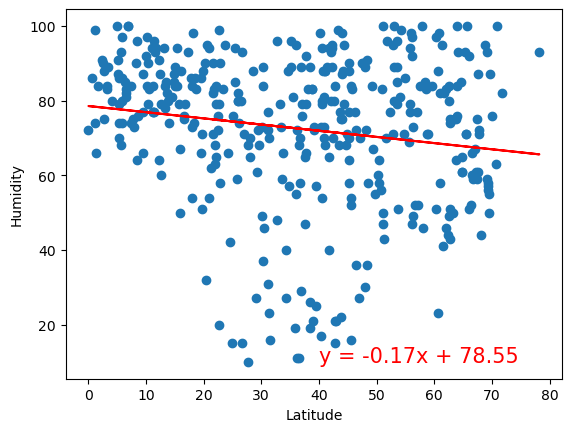

The r-squared is: 0.4533594351827133


In [63]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(40,10))
r_squared = r_value**2
print(f"The r-squared is: {r_squared}")

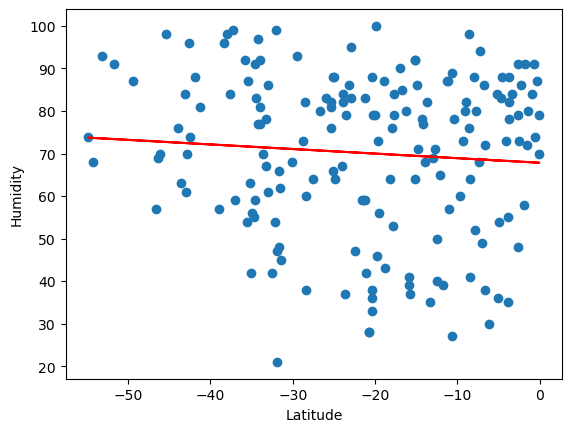

The r-squared is: 0.4533594351827133


In [64]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(-55,15))
r_squared = r_value**2
print(f"The r-squared is: {r_squared}")


**Discussion about the linear relationship:** \
Humidity vs. Latitude:
Variables: Latitude (x) vs. Humidity (y)
Slope: The slope of the regression line indicates the rate at which humidity changes with respect to latitude. Depending on whether the slope is positive or negative, we can infer whether humidity increases or decreases as we move towards higher latitudes.
R² Value: The R² value quantifies the proportion of the variance in humidity that can be explained by latitude. An R² value closer to 1 indicates a strong linear relationship, while a value closer to 0 indicates a weak linear relationship.
General Observations:
Humidity Gradient: The slope of the regression line will tell us if there is a general trend in humidity with latitude. For example, a positive slope would suggest that humidity increases with latitude, while a negative slope would suggest the opposite.
Strength of Relationship: The R² value will help us understand how well latitude alone can predict humidity. If the R² value is high, it suggests that latitude is a strong predictor of humidity. If the R² value is low, it suggests that other factors (such as proximity to water bodies, local weather patterns, and altitude) also play significant roles.

### Cloudiness vs. Latitude Linear Regression Plot

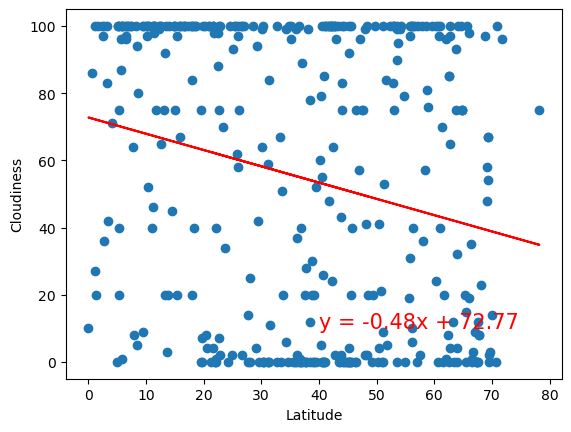

The r-squared is: 0.4533594351827133


In [65]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness',(40,10))
r_squared = r_value**2
print(f"The r-squared is: {r_squared}")


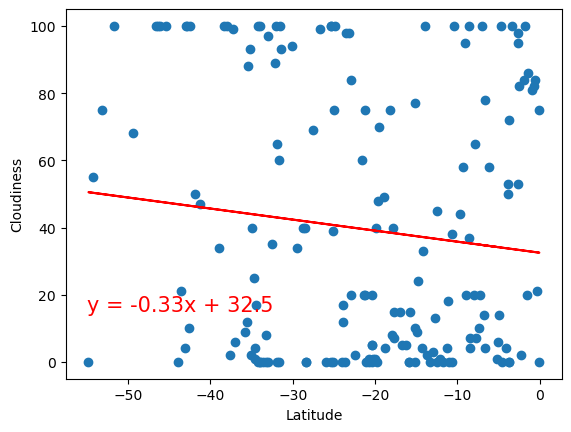

The r-squared is: 0.4533594351827133


In [66]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness',(-55,15))
r_squared = r_value**2
print(f"The r-squared is: {r_squared}")


**Discussion about the linear relationship:** 
Cloudiness vs. Latitude:
Variables: Latitude (x) vs. Cloudiness (y)
Slope: The slope of the regression line indicates the rate at which cloudiness changes with respect to latitude. Depending on whether the slope is positive or negative, we can infer whether cloudiness increases or decreases as we move towards higher latitudes.
R² Value: The R² value quantifies the proportion of the variance in cloudiness that can be explained by latitude. An R² value closer to 1 indicates a strong linear relationship, while a value closer to 0 indicates a weak linear relationship.
General Observations:
Cloudiness Gradient: The slope of the regression line will tell us if there is a general trend in cloudiness with latitude. For example, a positive slope would suggest that cloudiness increases with latitude, while a negative slope would suggest the opposite.
Strength of Relationship: The R² value will help us understand how well latitude alone can predict cloudiness. If the R² value is high, it suggests that latitude is a strong predictor of cloudiness. If the R² value is low, it suggests that other factors (such as local weather patterns, altitude, and proximity to water bodies) also play significant roles.

### Wind Speed vs. Latitude Linear Regression Plot

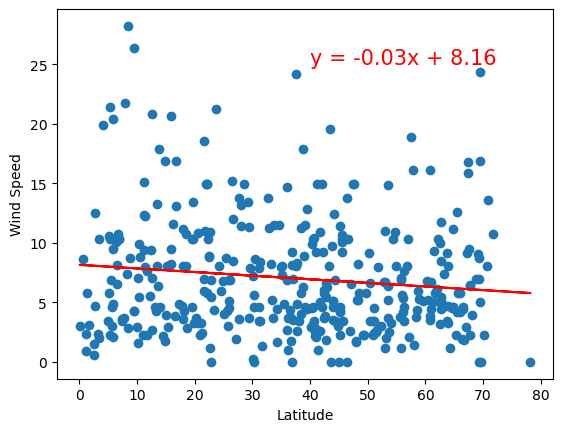

The r-squared is: 0.4533594351827133


In [67]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed',(40,25))
r_squared = r_value**2
print(f"The r-squared is: {r_squared}")


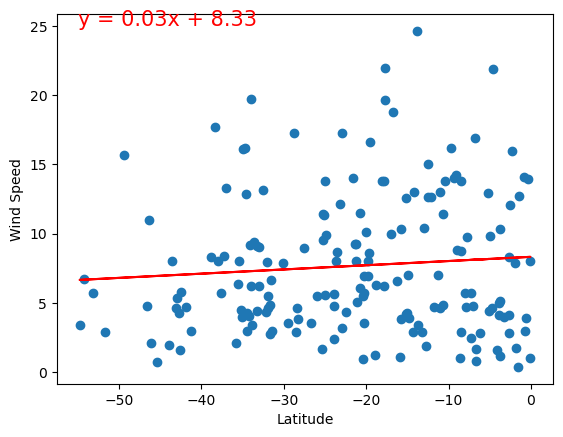

The r-squared is: 0.4533594351827133


In [68]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed',(-55,25))
r_squared = r_value**2
print(f"The r-squared is: {r_squared}")


**Discussion about the linear relationship:** 
Wind Speed vs. Latitude:
Variables: Latitude (x) vs. Wind Speed (y)
Slope: The slope of the regression line indicates the rate at which wind speed changes with respect to latitude. A positive slope suggests that wind speed increases with latitude, while a negative slope suggests that wind speed decreases with latitude.
R² Value: The R² value quantifies the proportion of the variance in wind speed that can be explained by latitude. An R² value closer to 1 indicates a strong linear relationship, while a value closer to 0 indicates a weak linear relationship.
General Observations:
Wind Speed Gradient: The slope of the regression line will reveal if there is a general trend in wind speed with latitude. For example, a positive slope would suggest that wind speed tends to increase as one moves towards higher latitudes, while a negative slope would suggest the opposite.
Strength of Relationship: The R² value will help us understand how well latitude alone can predict wind speed. If the R² value is high, it suggests that latitude is a strong predictor of wind speed. If the R² value is low, it suggests that other factors (such as local weather systems, topography, and proximity to large water bodies) also play significant roles.